## Analyze datasets from ion beam imaging

In this example, we're analyzing a experimental datasets from NanoSIMS/MIBI and extract movies from sequential scans, followed by STIRM-like localization analysis (the code is from original STORM projects)

### Configuring the directory
Create an empty directory somewhere on your computer and tell Python to go to that directory.

In [3]:
import os

os.chdir(r"C:\Users\acoskun7\Dropbox\2018CLAB\13 Manuscripts\2019IonBeamSuperResTomography\REVORGDATA\paper\extractionScriptsSTIRM")

#Initialize path_current as the folder in which the 'movie.tif' will be stored. 

#os.chdir(r"C:\Users\shamb\Documents\GRA\STIRM\movies")

path_current = os.getcwd()

print(path_current)

C:\Users\acoskun7\Dropbox\2018CLAB\13 Manuscripts\2019IonBeamSuperResTomography\REVORGDATA\paper\extractionScriptsSTIRM


### Create a tif movie from the tif images(Reading all the images in the folder)

In [4]:
import glob
import tifffile
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplot
import scipy
from PIL import Image
import imageio
#!pip install pims

import matplotlib
import matplotlib.pyplot as pyplot
#x variable is image number from which the processing starts
x = 0

#y variable is the size of the window 
y = 20



tif_files = glob.glob(os.path.join(r"C:\Users\acoskun7\Documents\data\Nalm6alsoFig5101917\iodrep-3x-all-100", "*.tif"))

#creating directories for saving different images
path_raw = os.path.join(path_current,'raw_images')
path_stirm = os.path.join(path_current,'stirmreconst_images')

if os.path.isdir(path_raw) == False:
        os.mkdir(path_raw)
if os.path.isdir(path_stirm) == False:
        os.mkdir(path_stirm)


while x < (len(tif_files)-y):


    with tifffile.TiffWriter("movie.tif") as tf:
        for fname in sorted(tif_files[x:x+y]):
            image = tifffile.imread(fname)
            tf.save(image)


    import pims
    imstack=pims.open('movie.tif')
    imstack=np.array(imstack,np.uint32)

    
    #obtaining shape of each image
    m,n = imstack[1].shape
    dim = np.zeros((m,n))
    
    
    import storm_analysis.daostorm_3d.mufit_analysis as mfit

    # Delete any stale results.
    if os.path.exists("movie.hdf5"):
        os.remove("movie.hdf5")

    %time mfit.analyze("movie.tif", "movie.hdf5", "analysis.xml")

    
    
    import storm_analysis.sa_library.parameters as parameters

    params = parameters.ParametersDAO()

    # Analyze the whole movie.
    params.changeAttr("max_frame", -1)    
    params.changeAttr("start_frame", -1)

    params.changeAttr("background_sigma", 8.0)

    # These were specified on the website for this dataset.
    params.changeAttr("camera_gain", 1.0)
    params.changeAttr("camera_offset", 0.03)

    # Since this parameter can be either a float or an int we need
    # to specify which type we want it to be.
    params.changeAttr("find_max_radius", 5, node_type = "float")

    params.changeAttr("foreground_sigma", 1.0)
    params.changeAttr("iterations", 20)
    params.changeAttr("model", "2dfixed")
    params.changeAttr("pixel_size", 35.0)
    params.changeAttr("roi_size", 10)

    # Convert from FWHM in nanometers to sigma in pixels.
    params.changeAttr("sigma", 150.1/(35.0 * 2.355))
    params.changeAttr("threshold", 0.03)

    # Don't do tracking.
    params.changeAttr("radius", "0.0")
    params.changeAttr("descriptor", "1")

    # Don't do drift-correction.
    params.changeAttr("drift_correction", 0)

    params.toXMLFile("analysis.xml", pretty = True)

    
    import storm_analysis.daostorm_3d.mufit_analysis as mfit

    # Delete any stale results.
    if os.path.exists("movie.hdf5"):
        os.remove("movie.hdf5")

    %time mfit.analyze("movie.tif", "movie.hdf5", "analysis.xml")
    
    import matplotlib
    import matplotlib.pyplot as pyplot

    import glob
    import tifffile
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as pyplot
    import scipy
    from PIL import Image
    import imageio

    import storm_analysis.sa_utilities.hdf5_to_image as h5_image
    
    
    #sigma=0.75 for chromatin
    sr_im = h5_image.render2DImage("movie.hdf5", scale = 1, sigma =1)
    
    os.chdir(path_stirm)
    
    #imageio.imwrite('Idutestimg_' + str(x)+ '_' + str(x+y) + '.png', sr_im)

    imageio.imwrite('IodRep2Cell14img_' + str(x)+ '_' + str(x+y) + '.tiff', sr_im.astype(np.uint16))

    
    #increments the window 
    x = x + 1   
    
#return to original folder
os.chdir(path_current)


Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 14 14
 Removing values < 1.0 in frame 1
Frame: 1 16 30
 Removing values < 1.0 in frame 2
Frame: 2 23 53
 Removing values < 1.0 in frame 3
Frame: 3 16 69
 Removing values < 1.0 in frame 4
Frame: 4 24 93
 Removing values < 1.0 in frame 5
Frame: 5 24 117
 Removing values < 1.0 in frame 6
Frame: 6 30 147
 Removing values < 1.0 in frame 7
Frame: 7 19 166
 Removing values < 1.0 in frame 8
Frame: 8 23 189
 Removing values < 1.0 in frame 9
Frame: 9 24 213
 Removing values < 1.0 in frame 10
Frame: 10 21 234
 Removing values < 1.0 in frame 11
Frame: 11 18 252
 Removing values < 1.0 in frame 12
Frame: 12 25 277
 Removing values < 1.0 in frame 13
Frame: 13 30 307
 Removing values < 1.0 in frame 14
Frame: 14 28 335
 Removing values < 1.0 in frame 15
Frame: 15 39 374
 Removing values < 1.0 in frame 16
Frame: 16 32 406
 Removing values < 1.0 in frame 17
Frame: 17 37 443
 Removing values < 1.0 in frame 18
Frame: 18 17 460
 Removing values < 1.0 

Frame: 8 21 556
 Removing values < 1.0 in frame 9
Frame: 9 71 627
 Removing values < 1.0 in frame 10
Frame: 10 44 671
 Removing values < 1.0 in frame 11
Frame: 11 103 774
 Removing values < 1.0 in frame 12
Frame: 12 41 815
 Removing values < 1.0 in frame 13
Frame: 13 39 854
 Removing values < 1.0 in frame 14
Frame: 14 32 886
 Removing values < 1.0 in frame 15
Frame: 15 37 923
 Removing values < 1.0 in frame 16
Frame: 16 53 976
 Removing values < 1.0 in frame 17
Frame: 17 82 1058
 Removing values < 1.0 in frame 18
Frame: 18 32 1090
 Removing values < 1.0 in frame 19
Frame: 19 31 1121

Added 1121
   245 peak finding iterations.

   0 fits reset due to Cholesky failure.
   95 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   1621 fits reset due to negative height.
   49029 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   0 fits were lost.
   38 peaks lost to proximity filter.
   395 peaks lost to low significance.
   42150

Frame: 16 31 864
 Removing values < 1.0 in frame 17
Frame: 17 118 982
 Removing values < 1.0 in frame 18
Frame: 18 22 1004
 Removing values < 1.0 in frame 19
Frame: 19 36 1040

Added 1040
   231 peak finding iterations.

   0 fits reset due to Cholesky failure.
   121 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   1634 fits reset due to negative height.
   42560 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   0 fits were lost.
   41 peaks lost to proximity filter.
   374 peaks lost to low significance.
   393568 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 26.8 s

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 102 102
 Removing values < 1.0 in frame 1
Frame: 1 72 174
 Removing values < 1.0 in frame 2
Frame: 2 19 193
 Removing values < 1.0 in frame 3
Frame: 3 23 216
 Removing values < 1.0 in frame 4
Frame: 4 62 278
 Removing values < 1.0 in frame 5
Frame: 5 21 299
 Removin

.

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 23 23
 Removing values < 1.0 in frame 1
Frame: 1 62 85
 Removing values < 1.0 in frame 2
Frame: 2 21 106
 Removing values < 1.0 in frame 3
Frame: 3 71 177
 Removing values < 1.0 in frame 4
Frame: 4 44 221
 Removing values < 1.0 in frame 5
Frame: 5 103 324
 Removing values < 1.0 in frame 6
Frame: 6 41 365
 Removing values < 1.0 in frame 7
Frame: 7 39 404
 Removing values < 1.0 in frame 8
Frame: 8 32 436
 Removing values < 1.0 in frame 9
Frame: 9 37 473
 Removing values < 1.0 in frame 10
Frame: 10 53 526
 Removing values < 1.0 in frame 11
Frame: 11 82 608
 Removing values < 1.0 in frame 12
Frame: 12 32 640
 Removing values < 1.0 in frame 13
Frame: 13 31 671
 Removing values < 1.0 in frame 14
Frame: 14 118 789
 Removing values < 1.0 in frame 15
Frame: 15 22 811
 Removing values < 1.0 in frame 16
Frame: 16 36 847
 Removing values < 1.0 in frame 17
Frame: 17 63 910
 Removing values < 1.0 in frame 18
Frame: 18 32 942
 Removing values

Frame: 8 53 441
 Removing values < 1.0 in frame 9
Frame: 9 82 523
 Removing values < 1.0 in frame 10
Frame: 10 32 555
 Removing values < 1.0 in frame 11
Frame: 11 31 586
 Removing values < 1.0 in frame 12
Frame: 12 118 704
 Removing values < 1.0 in frame 13
Frame: 13 22 726
 Removing values < 1.0 in frame 14
Frame: 14 36 762
 Removing values < 1.0 in frame 15
Frame: 15 63 825
 Removing values < 1.0 in frame 16
Frame: 16 32 857
 Removing values < 1.0 in frame 17
Frame: 17 124 981
 Removing values < 1.0 in frame 18
Frame: 18 87 1068
 Removing values < 1.0 in frame 19
Frame: 19 235 1303

Added 1303
   252 peak finding iterations.

   0 fits reset due to Cholesky failure.
   142 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   1983 fits reset due to negative height.
   60604 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   1 fits were lost.
   46 peaks lost to proximity filter.
   511 peaks lost to low significance.
   541

Frame: 16 235 1167
 Removing values < 1.0 in frame 17
Frame: 17 78 1245
 Removing values < 1.0 in frame 18
Frame: 18 62 1307
 Removing values < 1.0 in frame 19
Frame: 19 42 1349

Added 1349
   257 peak finding iterations.

   0 fits reset due to Cholesky failure.
   151 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   2008 fits reset due to negative height.
   64128 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   1 fits were lost.
   51 peaks lost to proximity filter.
   522 peaks lost to low significance.
   570926 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 29.3 s

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 103 103
 Removing values < 1.0 in frame 1
Frame: 1 41 144
 Removing values < 1.0 in frame 2
Frame: 2 39 183
 Removing values < 1.0 in frame 3
Frame: 3 32 215
 Removing values < 1.0 in frame 4
Frame: 4 37 252
 Removing values < 1.0 in frame 5
Frame: 5 53 305
 Remov

.

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 32 32
 Removing values < 1.0 in frame 1
Frame: 1 37 69
 Removing values < 1.0 in frame 2
Frame: 2 53 122
 Removing values < 1.0 in frame 3
Frame: 3 82 204
 Removing values < 1.0 in frame 4
Frame: 4 32 236
 Removing values < 1.0 in frame 5
Frame: 5 31 267
 Removing values < 1.0 in frame 6
Frame: 6 118 385
 Removing values < 1.0 in frame 7
Frame: 7 22 407
 Removing values < 1.0 in frame 8
Frame: 8 36 443
 Removing values < 1.0 in frame 9
Frame: 9 63 506
 Removing values < 1.0 in frame 10
Frame: 10 32 538
 Removing values < 1.0 in frame 11
Frame: 11 124 662
 Removing values < 1.0 in frame 12
Frame: 12 87 749
 Removing values < 1.0 in frame 13
Frame: 13 235 984
 Removing values < 1.0 in frame 14
Frame: 14 78 1062
 Removing values < 1.0 in frame 15
Frame: 15 62 1124
 Removing values < 1.0 in frame 16
Frame: 16 42 1166
 Removing values < 1.0 in frame 17
Frame: 17 45 1211
 Removing values < 1.0 in frame 18
Frame: 18 201 1412
 Removing

Frame: 7 63 437
 Removing values < 1.0 in frame 8
Frame: 8 32 469
 Removing values < 1.0 in frame 9
Frame: 9 124 593
 Removing values < 1.0 in frame 10
Frame: 10 87 680
 Removing values < 1.0 in frame 11
Frame: 11 235 915
 Removing values < 1.0 in frame 12
Frame: 12 78 993
 Removing values < 1.0 in frame 13
Frame: 13 62 1055
 Removing values < 1.0 in frame 14
Frame: 14 42 1097
 Removing values < 1.0 in frame 15
Frame: 15 45 1142
 Removing values < 1.0 in frame 16
Frame: 16 201 1343
 Removing values < 1.0 in frame 17
Frame: 17 125 1468
 Removing values < 1.0 in frame 18
Frame: 18 148 1616
 Removing values < 1.0 in frame 19
Frame: 19 156 1772

Added 1772
   290 peak finding iterations.

   0 fits reset due to Cholesky failure.
   168 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   2631 fits reset due to negative height.
   92096 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   1 fits were lost.
   73 peaks lost to proxi

Frame: 14 125 1301
 Removing values < 1.0 in frame 15
Frame: 15 148 1449
 Removing values < 1.0 in frame 16
Frame: 16 156 1605
 Removing values < 1.0 in frame 17
Frame: 17 257 1862
 Removing values < 1.0 in frame 18
Frame: 18 164 2026
 Removing values < 1.0 in frame 19
Frame: 19 263 2289

Added 2289
   306 peak finding iterations.

   0 fits reset due to Cholesky failure.
   338 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   4122 fits reset due to negative height.
   132035 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   3 fits were lost.
   102 peaks lost to proximity filter.
   1100 peaks lost to low significance.
   1159942 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 38.9 s

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 31 31
 Removing values < 1.0 in frame 1
Frame: 1 118 149
 Removing values < 1.0 in frame 2
Frame: 2 22 171
 Removing values < 1.0 in frame 3
Frame: 3

.

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 36 36
 Removing values < 1.0 in frame 1
Frame: 1 63 99
 Removing values < 1.0 in frame 2
Frame: 2 32 131
 Removing values < 1.0 in frame 3
Frame: 3 124 255
 Removing values < 1.0 in frame 4
Frame: 4 87 342
 Removing values < 1.0 in frame 5
Frame: 5 235 577
 Removing values < 1.0 in frame 6
Frame: 6 78 655
 Removing values < 1.0 in frame 7
Frame: 7 62 717
 Removing values < 1.0 in frame 8
Frame: 8 42 759
 Removing values < 1.0 in frame 9
Frame: 9 45 804
 Removing values < 1.0 in frame 10
Frame: 10 201 1005
 Removing values < 1.0 in frame 11
Frame: 11 125 1130
 Removing values < 1.0 in frame 12
Frame: 12 148 1278
 Removing values < 1.0 in frame 13
Frame: 13 156 1434
 Removing values < 1.0 in frame 14
Frame: 14 257 1691
 Removing values < 1.0 in frame 15
Frame: 15 164 1855
 Removing values < 1.0 in frame 16
Frame: 16 263 2118
 Removing values < 1.0 in frame 17
Frame: 17 223 2341
 Removing values < 1.0 in frame 18
Frame: 18 89 2430

Frame: 6 42 660
 Removing values < 1.0 in frame 7
Frame: 7 45 705
 Removing values < 1.0 in frame 8
Frame: 8 201 906
 Removing values < 1.0 in frame 9
Frame: 9 125 1031
 Removing values < 1.0 in frame 10
Frame: 10 148 1179
 Removing values < 1.0 in frame 11
Frame: 11 156 1335
 Removing values < 1.0 in frame 12
Frame: 12 257 1592
 Removing values < 1.0 in frame 13
Frame: 13 164 1756
 Removing values < 1.0 in frame 14
Frame: 14 263 2019
 Removing values < 1.0 in frame 15
Frame: 15 223 2242
 Removing values < 1.0 in frame 16
Frame: 16 89 2331
 Removing values < 1.0 in frame 17
Frame: 17 223 2554
 Removing values < 1.0 in frame 18
Frame: 18 213 2767
 Removing values < 1.0 in frame 19
Frame: 19 123 2890

Added 2890
   342 peak finding iterations.

   0 fits reset due to Cholesky failure.
   356 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   5426 fits reset due to negative height.
   176751 fits reset due to non-decreasing error (LM).
   2 fits did 

Frame: 11 263 1776
 Removing values < 1.0 in frame 12
Frame: 12 223 1999
 Removing values < 1.0 in frame 13
Frame: 13 89 2088
 Removing values < 1.0 in frame 14
Frame: 14 223 2311
 Removing values < 1.0 in frame 15
Frame: 15 213 2524
 Removing values < 1.0 in frame 16
Frame: 16 123 2647
 Removing values < 1.0 in frame 17
Frame: 17 269 2916
 Removing values < 1.0 in frame 18
Frame: 18 310 3226
 Removing values < 1.0 in frame 19
Frame: 19 87 3313

Added 3313
   356 peak finding iterations.

   0 fits reset due to Cholesky failure.
   431 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   6231 fits reset due to negative height.
   203592 fits reset due to non-decreasing error (LM).
   2 fits did not converge.
   2 fits were lost.
   175 peaks lost to proximity filter.
   1670 peaks lost to low significance.
   1820120 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 49.7 s

Peak finding
 Removing values < 1.0 in frame 

Frame: 17 87 3000
 Removing values < 1.0 in frame 18
Frame: 18 177 3177
 Removing values < 1.0 in frame 19
Frame: 19 109 3286

Added 3286
   356 peak finding iterations.

   0 fits reset due to Cholesky failure.
   419 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   6391 fits reset due to negative height.
   199733 fits reset due to non-decreasing error (LM).
   3 fits did not converge.
   2 fits were lost.
   193 peaks lost to proximity filter.
   1648 peaks lost to low significance.
   1789349 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 49.2 s
Tracks not found, using localizations.
.

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 42 42
 Removing values < 1.0 in frame 1
Frame: 1 45 87
 Removing values < 1.0 in frame 2
Frame: 2 201 288
 Removing values < 1.0 in frame 3
Frame: 3 125 413
 Removing values < 1.0 in frame 4
Frame: 4 148 561
 Removing values < 1.0 in frame 5
Frame: 5 156 717
 Removing va

Frame: 0 201 201
 Removing values < 1.0 in frame 1
Frame: 1 125 326
 Removing values < 1.0 in frame 2
Frame: 2 148 474
 Removing values < 1.0 in frame 3
Frame: 3 156 630
 Removing values < 1.0 in frame 4
Frame: 4 257 887
 Removing values < 1.0 in frame 5
Frame: 5 164 1051
 Removing values < 1.0 in frame 6
Frame: 6 263 1314
 Removing values < 1.0 in frame 7
Frame: 7 223 1537
 Removing values < 1.0 in frame 8
Frame: 8 89 1626
 Removing values < 1.0 in frame 9
Frame: 9 223 1849
 Removing values < 1.0 in frame 10
Frame: 10 213 2062
 Removing values < 1.0 in frame 11
Frame: 11 123 2185
 Removing values < 1.0 in frame 12
Frame: 12 269 2454
 Removing values < 1.0 in frame 13
Frame: 13 310 2764
 Removing values < 1.0 in frame 14
Frame: 14 87 2851
 Removing values < 1.0 in frame 15
Frame: 15 177 3028
 Removing values < 1.0 in frame 16
Frame: 16 109 3137
 Removing values < 1.0 in frame 17
Frame: 17 124 3261
 Removing values < 1.0 in frame 18
Frame: 18 247 3508
 Removing values < 1.0 in frame 19


Frame: 5 89 1152
 Removing values < 1.0 in frame 6
Frame: 6 223 1375
 Removing values < 1.0 in frame 7
Frame: 7 213 1588
 Removing values < 1.0 in frame 8
Frame: 8 123 1711
 Removing values < 1.0 in frame 9
Frame: 9 269 1980
 Removing values < 1.0 in frame 10
Frame: 10 310 2290
 Removing values < 1.0 in frame 11
Frame: 11 87 2377
 Removing values < 1.0 in frame 12
Frame: 12 177 2554
 Removing values < 1.0 in frame 13
Frame: 13 109 2663
 Removing values < 1.0 in frame 14
Frame: 14 124 2787
 Removing values < 1.0 in frame 15
Frame: 15 247 3034
 Removing values < 1.0 in frame 16
Frame: 16 165 3199
 Removing values < 1.0 in frame 17
Frame: 17 181 3380
 Removing values < 1.0 in frame 18
Frame: 18 163 3543
 Removing values < 1.0 in frame 19
Frame: 19 278 3821

Added 3821
   393 peak finding iterations.

   0 fits reset due to Cholesky failure.
   481 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   7499 fits reset due to negative height.
   232105 fit

Frame: 10 177 2141
 Removing values < 1.0 in frame 11
Frame: 11 109 2250
 Removing values < 1.0 in frame 12
Frame: 12 124 2374
 Removing values < 1.0 in frame 13
Frame: 13 247 2621
 Removing values < 1.0 in frame 14
Frame: 14 165 2786
 Removing values < 1.0 in frame 15
Frame: 15 181 2967
 Removing values < 1.0 in frame 16
Frame: 16 163 3130
 Removing values < 1.0 in frame 17
Frame: 17 278 3408
 Removing values < 1.0 in frame 18
Frame: 18 473 3881
 Removing values < 1.0 in frame 19
Frame: 19 206 4087

Added 4087
   393 peak finding iterations.

   0 fits reset due to Cholesky failure.
   565 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   8438 fits reset due to negative height.
   255525 fits reset due to non-decreasing error (LM).
   4 fits did not converge.
   3 fits were lost.
   274 peaks lost to proximity filter.
   2128 peaks lost to low significance.
   2326311 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall tim

Frame: 14 278 2758
 Removing values < 1.0 in frame 15
Frame: 15 473 3231
 Removing values < 1.0 in frame 16
Frame: 16 206 3437
 Removing values < 1.0 in frame 17
Frame: 17 381 3818
 Removing values < 1.0 in frame 18
Frame: 18 301 4119
 Removing values < 1.0 in frame 19
Frame: 19 376 4495

Added 4495
   393 peak finding iterations.

   0 fits reset due to Cholesky failure.
   678 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   8228 fits reset due to negative height.
   282138 fits reset due to non-decreasing error (LM).
   4 fits did not converge.
   2 fits were lost.
   310 peaks lost to proximity filter.
   2296 peaks lost to low significance.
   2629374 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 59.4 s

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 89 89
 Removing values < 1.0 in frame 1
Frame: 1 223 312
 Removing values < 1.0 in frame 2
Frame: 2 213 525
 Removing values < 1.0 in frame 3
Frame: 

Frame: 19 219 4638

Added 4638
   397 peak finding iterations.

   0 fits reset due to Cholesky failure.
   657 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   8438 fits reset due to negative height.
   287735 fits reset due to non-decreasing error (LM).
   5 fits did not converge.
   3 fits were lost.
   325 peaks lost to proximity filter.
   2343 peaks lost to low significance.
   2662931 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 58.8 s
Tracks not found, using localizations.
.

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 123 123
 Removing values < 1.0 in frame 1
Frame: 1 269 392
 Removing values < 1.0 in frame 2
Frame: 2 310 702
 Removing values < 1.0 in frame 3
Frame: 3 87 789
 Removing values < 1.0 in frame 4
Frame: 4 177 966
 Removing values < 1.0 in frame 5
Frame: 5 109 1075
 Removing values < 1.0 in frame 6
Frame: 6 124 1199
 Removing values < 1.0 in frame 7
Frame: 7 247 1446
 Removing v

Frame: 0 310 310
 Removing values < 1.0 in frame 1
Frame: 1 87 397
 Removing values < 1.0 in frame 2
Frame: 2 177 574
 Removing values < 1.0 in frame 3
Frame: 3 109 683
 Removing values < 1.0 in frame 4
Frame: 4 124 807
 Removing values < 1.0 in frame 5
Frame: 5 247 1054
 Removing values < 1.0 in frame 6
Frame: 6 165 1219
 Removing values < 1.0 in frame 7
Frame: 7 181 1400
 Removing values < 1.0 in frame 8
Frame: 8 163 1563
 Removing values < 1.0 in frame 9
Frame: 9 278 1841
 Removing values < 1.0 in frame 10
Frame: 10 473 2314
 Removing values < 1.0 in frame 11
Frame: 11 206 2520
 Removing values < 1.0 in frame 12
Frame: 12 381 2901
 Removing values < 1.0 in frame 13
Frame: 13 301 3202
 Removing values < 1.0 in frame 14
Frame: 14 376 3578
 Removing values < 1.0 in frame 15
Frame: 15 236 3814
 Removing values < 1.0 in frame 16
Frame: 16 219 4033
 Removing values < 1.0 in frame 17
Frame: 17 444 4477
 Removing values < 1.0 in frame 18
Frame: 18 222 4699
 Removing values < 1.0 in frame 19

Frame: 5 163 989
 Removing values < 1.0 in frame 6
Frame: 6 278 1267
 Removing values < 1.0 in frame 7
Frame: 7 473 1740
 Removing values < 1.0 in frame 8
Frame: 8 206 1946
 Removing values < 1.0 in frame 9
Frame: 9 381 2327
 Removing values < 1.0 in frame 10
Frame: 10 301 2628
 Removing values < 1.0 in frame 11
Frame: 11 376 3004
 Removing values < 1.0 in frame 12
Frame: 12 236 3240
 Removing values < 1.0 in frame 13
Frame: 13 219 3459
 Removing values < 1.0 in frame 14
Frame: 14 444 3903
 Removing values < 1.0 in frame 15
Frame: 15 222 4125
 Removing values < 1.0 in frame 16
Frame: 16 273 4398
 Removing values < 1.0 in frame 17
Frame: 17 126 4524
 Removing values < 1.0 in frame 18
Frame: 18 263 4787
 Removing values < 1.0 in frame 19
Frame: 19 457 5244

Added 5244
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   746 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   8880 fits reset due to negative height.
   340107 fi

Frame: 10 236 3007
 Removing values < 1.0 in frame 11
Frame: 11 219 3226
 Removing values < 1.0 in frame 12
Frame: 12 444 3670
 Removing values < 1.0 in frame 13
Frame: 13 222 3892
 Removing values < 1.0 in frame 14
Frame: 14 273 4165
 Removing values < 1.0 in frame 15
Frame: 15 126 4291
 Removing values < 1.0 in frame 16
Frame: 16 263 4554
 Removing values < 1.0 in frame 17
Frame: 17 457 5011
 Removing values < 1.0 in frame 18
Frame: 18 250 5261
 Removing values < 1.0 in frame 19
Frame: 19 377 5638

Added 5638
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   791 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   9548 fits reset due to negative height.
   364996 fits reset due to non-decreasing error (LM).
   4 fits did not converge.
   4 fits were lost.
   368 peaks lost to proximity filter.
   2840 peaks lost to low significance.
   3310466 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall tim

Frame: 14 457 4418
 Removing values < 1.0 in frame 15
Frame: 15 250 4668
 Removing values < 1.0 in frame 16
Frame: 16 377 5045
 Removing values < 1.0 in frame 17
Frame: 17 243 5288
 Removing values < 1.0 in frame 18
Frame: 18 494 5782
 Removing values < 1.0 in frame 19
Frame: 19 309 6091

Added 6091
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   997 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   11333 fits reset due to negative height.
   395049 fits reset due to non-decreasing error (LM).
   7 fits did not converge.
   6 fits were lost.
   404 peaks lost to proximity filter.
   3028 peaks lost to low significance.
   3690955 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 1min 6s

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 163 163
 Removing values < 1.0 in frame 1
Frame: 1 278 441
 Removing values < 1.0 in frame 2
Frame: 2 473 914
 Removing values < 1.0 in frame 3
Fra

Frame: 18 360 6010
 Removing values < 1.0 in frame 19
Frame: 19 570 6580

Added 6580
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   1204 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   12392 fits reset due to negative height.
   431321 fits reset due to non-decreasing error (LM).
   8 fits did not converge.
   7 fits were lost.
   445 peaks lost to proximity filter.
   3302 peaks lost to low significance.
   4037746 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 1min 10s
Tracks not found, using localizations.
.

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 206 206
 Removing values < 1.0 in frame 1
Frame: 1 381 587
 Removing values < 1.0 in frame 2
Frame: 2 301 888
 Removing values < 1.0 in frame 3
Frame: 3 376 1264
 Removing values < 1.0 in frame 4
Frame: 4 236 1500
 Removing values < 1.0 in frame 5
Frame: 5 219 1719
 Removing values < 1.0 in frame 6
Frame: 6 444 2163
 R

Frame: 0 301 301
 Removing values < 1.0 in frame 1
Frame: 1 376 677
 Removing values < 1.0 in frame 2
Frame: 2 236 913
 Removing values < 1.0 in frame 3
Frame: 3 219 1132
 Removing values < 1.0 in frame 4
Frame: 4 444 1576
 Removing values < 1.0 in frame 5
Frame: 5 222 1798
 Removing values < 1.0 in frame 6
Frame: 6 273 2071
 Removing values < 1.0 in frame 7
Frame: 7 126 2197
 Removing values < 1.0 in frame 8
Frame: 8 263 2460
 Removing values < 1.0 in frame 9
Frame: 9 457 2917
 Removing values < 1.0 in frame 10
Frame: 10 250 3167
 Removing values < 1.0 in frame 11
Frame: 11 377 3544
 Removing values < 1.0 in frame 12
Frame: 12 243 3787
 Removing values < 1.0 in frame 13
Frame: 13 494 4281
 Removing values < 1.0 in frame 14
Frame: 14 309 4590
 Removing values < 1.0 in frame 15
Frame: 15 360 4950
 Removing values < 1.0 in frame 16
Frame: 16 570 5520
 Removing values < 1.0 in frame 17
Frame: 17 204 5724
 Removing values < 1.0 in frame 18
Frame: 18 383 6107
 Removing values < 1.0 in frame

Frame: 4 126 1284
 Removing values < 1.0 in frame 5
Frame: 5 263 1547
 Removing values < 1.0 in frame 6
Frame: 6 457 2004
 Removing values < 1.0 in frame 7
Frame: 7 250 2254
 Removing values < 1.0 in frame 8
Frame: 8 377 2631
 Removing values < 1.0 in frame 9
Frame: 9 243 2874
 Removing values < 1.0 in frame 10
Frame: 10 494 3368
 Removing values < 1.0 in frame 11
Frame: 11 309 3677
 Removing values < 1.0 in frame 12
Frame: 12 360 4037
 Removing values < 1.0 in frame 13
Frame: 13 570 4607
 Removing values < 1.0 in frame 14
Frame: 14 204 4811
 Removing values < 1.0 in frame 15
Frame: 15 383 5194
 Removing values < 1.0 in frame 16
Frame: 16 473 5667
 Removing values < 1.0 in frame 17
Frame: 17 387 6054
 Removing values < 1.0 in frame 18
Frame: 18 519 6573
 Removing values < 1.0 in frame 19
Frame: 19 702 7275

Added 7275
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   1350 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
 

Frame: 8 494 2705
 Removing values < 1.0 in frame 9
Frame: 9 309 3014
 Removing values < 1.0 in frame 10
Frame: 10 360 3374
 Removing values < 1.0 in frame 11
Frame: 11 570 3944
 Removing values < 1.0 in frame 12
Frame: 12 204 4148
 Removing values < 1.0 in frame 13
Frame: 13 383 4531
 Removing values < 1.0 in frame 14
Frame: 14 473 5004
 Removing values < 1.0 in frame 15
Frame: 15 387 5391
 Removing values < 1.0 in frame 16
Frame: 16 519 5910
 Removing values < 1.0 in frame 17
Frame: 17 702 6612
 Removing values < 1.0 in frame 18
Frame: 18 484 7096
 Removing values < 1.0 in frame 19
Frame: 19 610 7706

Added 7706
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   1403 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   15250 fits reset due to negative height.
   500916 fits reset due to non-decreasing error (LM).
   9 fits did not converge.
   12 fits were lost.
   532 peaks lost to proximity filter.
   3795 peaks lost to

Frame: 12 387 4770
 Removing values < 1.0 in frame 13
Frame: 13 519 5289
 Removing values < 1.0 in frame 14
Frame: 14 702 5991
 Removing values < 1.0 in frame 15
Frame: 15 484 6475
 Removing values < 1.0 in frame 16
Frame: 16 610 7085
 Removing values < 1.0 in frame 17
Frame: 17 632 7717
 Removing values < 1.0 in frame 18
Frame: 18 562 8279
 Removing values < 1.0 in frame 19
Frame: 19 435 8714

Added 8714
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   1661 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   17391 fits reset due to negative height.
   565929 fits reset due to non-decreasing error (LM).
   10 fits did not converge.
   13 fits were lost.
   607 peaks lost to proximity filter.
   4257 peaks lost to low significance.
   5402020 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 1min 18s

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 263 263
 Removing values < 1.0 in f

Frame: 16 562 7559
 Removing values < 1.0 in frame 17
Frame: 17 435 7994
 Removing values < 1.0 in frame 18
Frame: 18 636 8630
 Removing values < 1.0 in frame 19
Frame: 19 678 9308

Added 9308
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   1771 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   18887 fits reset due to negative height.
   607437 fits reset due to non-decreasing error (LM).
   9 fits did not converge.
   14 fits were lost.
   625 peaks lost to proximity filter.
   4579 peaks lost to low significance.
   5747377 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 1min 20s
Tracks not found, using localizations.
.

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 377 377
 Removing values < 1.0 in frame 1
Frame: 1 243 620
 Removing values < 1.0 in frame 2
Frame: 2 494 1114
 Removing values < 1.0 in frame 3
Frame: 3 309 1423
 Removing values < 1.0 in frame 4
Frame: 4 360 1

Frame: 19 317 9948

Added 9948
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   2005 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   20102 fits reset due to negative height.
   671079 fits reset due to non-decreasing error (LM).
   8 fits did not converge.
   14 fits were lost.
   676 peaks lost to proximity filter.
   4938 peaks lost to low significance.
   6239019 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 1min 24s

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 494 494
 Removing values < 1.0 in frame 1
Frame: 1 309 803
 Removing values < 1.0 in frame 2
Frame: 2 360 1163
 Removing values < 1.0 in frame 3
Frame: 3 570 1733
 Removing values < 1.0 in frame 4
Frame: 4 204 1937
 Removing values < 1.0 in frame 5
Frame: 5 383 2320
 Removing values < 1.0 in frame 6
Frame: 6 473 2793
 Removing values < 1.0 in frame 7
Frame: 7 387 3180
 Removing values < 1.0 in frame 8
Frame: 8 

.

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 570 570
 Removing values < 1.0 in frame 1
Frame: 1 204 774
 Removing values < 1.0 in frame 2
Frame: 2 383 1157
 Removing values < 1.0 in frame 3
Frame: 3 473 1630
 Removing values < 1.0 in frame 4
Frame: 4 387 2017
 Removing values < 1.0 in frame 5
Frame: 5 519 2536
 Removing values < 1.0 in frame 6
Frame: 6 702 3238
 Removing values < 1.0 in frame 7
Frame: 7 484 3722
 Removing values < 1.0 in frame 8
Frame: 8 610 4332
 Removing values < 1.0 in frame 9
Frame: 9 632 4964
 Removing values < 1.0 in frame 10
Frame: 10 562 5526
 Removing values < 1.0 in frame 11
Frame: 11 435 5961
 Removing values < 1.0 in frame 12
Frame: 12 636 6597
 Removing values < 1.0 in frame 13
Frame: 13 678 7275
 Removing values < 1.0 in frame 14
Frame: 14 655 7930
 Removing values < 1.0 in frame 15
Frame: 15 538 8468
 Removing values < 1.0 in frame 16
Frame: 16 317 8785
 Removing values < 1.0 in frame 17
Frame: 17 464 9249
 Removing values < 1.0 in frame 18

Frame: 3 519 1762
 Removing values < 1.0 in frame 4
Frame: 4 702 2464
 Removing values < 1.0 in frame 5
Frame: 5 484 2948
 Removing values < 1.0 in frame 6
Frame: 6 610 3558
 Removing values < 1.0 in frame 7
Frame: 7 632 4190
 Removing values < 1.0 in frame 8
Frame: 8 562 4752
 Removing values < 1.0 in frame 9
Frame: 9 435 5187
 Removing values < 1.0 in frame 10
Frame: 10 636 5823
 Removing values < 1.0 in frame 11
Frame: 11 678 6501
 Removing values < 1.0 in frame 12
Frame: 12 655 7156
 Removing values < 1.0 in frame 13
Frame: 13 538 7694
 Removing values < 1.0 in frame 14
Frame: 14 317 8011
 Removing values < 1.0 in frame 15
Frame: 15 464 8475
 Removing values < 1.0 in frame 16
Frame: 16 612 9087
 Removing values < 1.0 in frame 17
Frame: 17 456 9543
 Removing values < 1.0 in frame 18
Frame: 18 457 10000
 Removing values < 1.0 in frame 19
Frame: 19 552 10552

Added 10552
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   1915 fits reset due to image margin.
 

Frame: 6 435 3944
 Removing values < 1.0 in frame 7
Frame: 7 636 4580
 Removing values < 1.0 in frame 8
Frame: 8 678 5258
 Removing values < 1.0 in frame 9
Frame: 9 655 5913
 Removing values < 1.0 in frame 10
Frame: 10 538 6451
 Removing values < 1.0 in frame 11
Frame: 11 317 6768
 Removing values < 1.0 in frame 12
Frame: 12 464 7232
 Removing values < 1.0 in frame 13
Frame: 13 612 7844
 Removing values < 1.0 in frame 14
Frame: 14 456 8300
 Removing values < 1.0 in frame 15
Frame: 15 457 8757
 Removing values < 1.0 in frame 16
Frame: 16 552 9309
 Removing values < 1.0 in frame 17
Frame: 17 612 9921
 Removing values < 1.0 in frame 18
Frame: 18 497 10418
 Removing values < 1.0 in frame 19
Frame: 19 435 10853

Added 10853
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   1951 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   19679 fits reset due to negative height.
   728651 fits reset due to non-decreasing error (LM).
   

Frame: 10 464 6011
 Removing values < 1.0 in frame 11
Frame: 11 612 6623
 Removing values < 1.0 in frame 12
Frame: 12 456 7079
 Removing values < 1.0 in frame 13
Frame: 13 457 7536
 Removing values < 1.0 in frame 14
Frame: 14 552 8088
 Removing values < 1.0 in frame 15
Frame: 15 612 8700
 Removing values < 1.0 in frame 16
Frame: 16 497 9197
 Removing values < 1.0 in frame 17
Frame: 17 435 9632
 Removing values < 1.0 in frame 18
Frame: 18 379 10011
 Removing values < 1.0 in frame 19
Frame: 19 767 10778

Added 10778
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   2022 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   20654 fits reset due to negative height.
   729808 fits reset due to non-decreasing error (LM).
   10 fits did not converge.
   9 fits were lost.
   744 peaks lost to proximity filter.
   5314 peaks lost to low significance.
   6700993 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wa

Frame: 13 497 7471
 Removing values < 1.0 in frame 14
Frame: 14 435 7906
 Removing values < 1.0 in frame 15
Frame: 15 379 8285
 Removing values < 1.0 in frame 16
Frame: 16 767 9052
 Removing values < 1.0 in frame 17
Frame: 17 283 9335
 Removing values < 1.0 in frame 18
Frame: 18 499 9834
 Removing values < 1.0 in frame 19
Frame: 19 399 10233

Added 10233
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   2006 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   18865 fits reset due to negative height.
   698954 fits reset due to non-decreasing error (LM).
   9 fits did not converge.
   7 fits were lost.
   752 peaks lost to proximity filter.
   5177 peaks lost to low significance.
   6422130 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 1min 25s

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 562 562
 Removing values < 1.0 in frame 1
Frame: 1 435 997
 Removing values < 1.0 in fram

Frame: 17 399 9236
 Removing values < 1.0 in frame 18
Frame: 18 684 9920
 Removing values < 1.0 in frame 19
Frame: 19 608 10528

Added 10528
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   1963 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   19756 fits reset due to negative height.
   725778 fits reset due to non-decreasing error (LM).
   8 fits did not converge.
   5 fits were lost.
   759 peaks lost to proximity filter.
   5323 peaks lost to low significance.
   6654620 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 1min 25s
Tracks not found, using localizations.
.

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 678 678
 Removing values < 1.0 in frame 1
Frame: 1 655 1333
 Removing values < 1.0 in frame 2
Frame: 2 538 1871
 Removing values < 1.0 in frame 3
Frame: 3 317 2188
 Removing values < 1.0 in frame 4
Frame: 4 464 2652
 Removing values < 1.0 in frame 5
Frame: 5 612 3

Frame: 0 538 538
 Removing values < 1.0 in frame 1
Frame: 1 317 855
 Removing values < 1.0 in frame 2
Frame: 2 464 1319
 Removing values < 1.0 in frame 3
Frame: 3 612 1931
 Removing values < 1.0 in frame 4
Frame: 4 456 2387
 Removing values < 1.0 in frame 5
Frame: 5 457 2844
 Removing values < 1.0 in frame 6
Frame: 6 552 3396
 Removing values < 1.0 in frame 7
Frame: 7 612 4008
 Removing values < 1.0 in frame 8
Frame: 8 497 4505
 Removing values < 1.0 in frame 9
Frame: 9 435 4940
 Removing values < 1.0 in frame 10
Frame: 10 379 5319
 Removing values < 1.0 in frame 11
Frame: 11 767 6086
 Removing values < 1.0 in frame 12
Frame: 12 283 6369
 Removing values < 1.0 in frame 13
Frame: 13 499 6868
 Removing values < 1.0 in frame 14
Frame: 14 399 7267
 Removing values < 1.0 in frame 15
Frame: 15 684 7951
 Removing values < 1.0 in frame 16
Frame: 16 608 8559
 Removing values < 1.0 in frame 17
Frame: 17 511 9070
 Removing values < 1.0 in frame 18
Frame: 18 612 9682
 Removing values < 1.0 in fram

Frame: 3 552 2077
 Removing values < 1.0 in frame 4
Frame: 4 612 2689
 Removing values < 1.0 in frame 5
Frame: 5 497 3186
 Removing values < 1.0 in frame 6
Frame: 6 435 3621
 Removing values < 1.0 in frame 7
Frame: 7 379 4000
 Removing values < 1.0 in frame 8
Frame: 8 767 4767
 Removing values < 1.0 in frame 9
Frame: 9 283 5050
 Removing values < 1.0 in frame 10
Frame: 10 499 5549
 Removing values < 1.0 in frame 11
Frame: 11 399 5948
 Removing values < 1.0 in frame 12
Frame: 12 684 6632
 Removing values < 1.0 in frame 13
Frame: 13 608 7240
 Removing values < 1.0 in frame 14
Frame: 14 511 7751
 Removing values < 1.0 in frame 15
Frame: 15 612 8363
 Removing values < 1.0 in frame 16
Frame: 16 694 9057
 Removing values < 1.0 in frame 17
Frame: 17 548 9605
 Removing values < 1.0 in frame 18
Frame: 18 509 10114
 Removing values < 1.0 in frame 19
Frame: 19 539 10653

Added 10653
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   1935 fits reset due to image margin.
 

Frame: 7 283 3982
 Removing values < 1.0 in frame 8
Frame: 8 499 4481
 Removing values < 1.0 in frame 9
Frame: 9 399 4880
 Removing values < 1.0 in frame 10
Frame: 10 684 5564
 Removing values < 1.0 in frame 11
Frame: 11 608 6172
 Removing values < 1.0 in frame 12
Frame: 12 511 6683
 Removing values < 1.0 in frame 13
Frame: 13 612 7295
 Removing values < 1.0 in frame 14
Frame: 14 694 7989
 Removing values < 1.0 in frame 15
Frame: 15 548 8537
 Removing values < 1.0 in frame 16
Frame: 16 509 9046
 Removing values < 1.0 in frame 17
Frame: 17 539 9585
 Removing values < 1.0 in frame 18
Frame: 18 583 10168
 Removing values < 1.0 in frame 19
Frame: 19 745 10913

Added 10913
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   2100 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   22028 fits reset due to negative height.
   756329 fits reset due to non-decreasing error (LM).
   10 fits did not converge.
   6 fits were lost.
   85

Frame: 10 612 5674
 Removing values < 1.0 in frame 11
Frame: 11 694 6368
 Removing values < 1.0 in frame 12
Frame: 12 548 6916
 Removing values < 1.0 in frame 13
Frame: 13 509 7425
 Removing values < 1.0 in frame 14
Frame: 14 539 7964
 Removing values < 1.0 in frame 15
Frame: 15 583 8547
 Removing values < 1.0 in frame 16
Frame: 16 745 9292
 Removing values < 1.0 in frame 17
Frame: 17 601 9893
 Removing values < 1.0 in frame 18
Frame: 18 500 10393
 Removing values < 1.0 in frame 19
Frame: 19 496 10889

Added 10889
   400 peak finding iterations.

   0 fits reset due to Cholesky failure.
   2159 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   22366 fits reset due to negative height.
   763698 fits reset due to non-decreasing error (LM).
   10 fits did not converge.
   6 fits were lost.
   861 peaks lost to proximity filter.
   5655 peaks lost to low significance.
   7063651 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wa

In [5]:
import matplotlib
import matplotlib.pyplot as pyplot
#x variable is image number from which the processing starts
x = 0

#y variable is the size of the window 
y = 20

#obtaining shape of each image
m,n = imstack[1].shape
dim = np.zeros((m,n))

#creating directories for saving different images
path_sum = os.path.join(path_current,'Summed_windowed_images')
path_blue = os.path.join(path_current,'Blue_sum_images')
path_cropped = os.path.join(path_current,'cropped_sum_images')
if os.path.isdir(path_sum) == False:
        os.mkdir(path_sum)
if os.path.isdir(path_blue) == False:
        os.mkdir(path_blue)
if os.path.isdir(path_cropped) == False:
        os.mkdir(path_cropped)
        
imsum = np.zeros((len(tif_files)-y,m,n))

#while loop does batch processing

while x < (len(tif_files)-y):
    
    #the following code sums the images over the desired window and saves it in a folder
    temp = np.empty((m,n))
    for i in np.arange(x,x+y,1):
        temp = imstack[i] + temp
    image = temp
    imsum[x] = 255*(image - np.min(image))/np.ptp(image).astype(int)
    os.chdir(path_sum)
    imageio.imwrite('sum_' + str(x)+ '_' + str(x+y) + '.tif', imsum[x])
    
    #extracts blue colour for display and saves it in a folder
    os.chdir(path_blue)
    im=imsum[x]
    #Rsumcrop = im.crop((195,310,375,490))
    #select blue color for the image display and save
    Rsum = np.stack((dim,im, dim), axis=2)/255;
    # fig=pyplot.figure(figsize = (8, 8))
    # pyplot.title("Sum Image")
    # pyplot.imshow(Rsum)
    imageio.imwrite('chromatin-forfig1-idu-sumcolor-whole_' + str(x)+ '_' + str(x+y) + '.tif', Rsum)
    
#     #crops the images and saves it in a folder
#     img = Image.fromarray(Rsum, 'RGB')
#     im = img.crop((250,250,350,350))
#     img = im
#     color=(0, 255, 0)
#     x = np.array(img)
#     r, g, b, a = np.rollaxis(x, axis=-1)
#     g[a == 0] = color[0]
#     im=g
#     dim = np.zeros((100,100))
#     #select blue color for the image display and save
#     R = np.stack((dim,im, dim), axis=2)/255;
# #     fig=pyplot.figure(figsize = (8, 8))
# #     pyplot.imshow(R)
# #     pyplot.show()
# #     print(R.shape)
#     matplotlib.image.imsave('chromatin-fig1-idu-sumcolor-smal_' + str(x) + '_' + str(x+y) + '.tif' , R)    
    
    #increments the window 
    x = x + 1    

#return to original folder
os.chdir(path_current)

In [76]:
# rgb = np.zeros((255, 255, 3), dtype=np.uint8)
# rgb[..., 0] = np.arange(255)
# rgb[..., 1] = 55
# rgb[..., 2] =  1- np.arange(255)

### Create an XML file for analysis

In [6]:
import storm_analysis.sa_library.parameters as parameters

params = parameters.ParametersDAO()

# Analyze the whole movie.
params.changeAttr("max_frame", -1)    
params.changeAttr("start_frame", -1)

params.changeAttr("background_sigma", 8.0)

# These were specified on the website for this dataset.
params.changeAttr("camera_gain", 1.0)
params.changeAttr("camera_offset", 0.6)

# Since this parameter can be either a float or an int we need
# to specify which type we want it to be.
params.changeAttr("find_max_radius", 5, node_type = "float")

params.changeAttr("foreground_sigma", 1.0)
params.changeAttr("iterations", 20)
params.changeAttr("model", "2dfixed")
params.changeAttr("pixel_size", 35.0)
params.changeAttr("roi_size", 10)

# Convert from FWHM in nanometers to sigma in pixels.
params.changeAttr("sigma", 150.1/(35.0 * 2.355))
params.changeAttr("threshold", 0.6)

# Don't do tracking.
params.changeAttr("radius", "0.0")
params.changeAttr("descriptor", "1")

# Don't do drift-correction.
params.changeAttr("drift_correction", 0)

params.toXMLFile("analysis.xml", pretty = True)

### Analyze the data

In [9]:
import storm_analysis.daostorm_3d.mufit_analysis as mfit

# Delete any stale results.
if os.path.exists("movie.hdf5"):
    os.remove("movie.hdf5")
    
%time mfit.analyze("movie.tif", "movie.hdf5", "analysis.xml")


Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 6782 6782
 Removing values < 1.0 in frame 1
Frame: 1 6960 13742
 Removing values < 1.0 in frame 2
Frame: 2 6948 20690
 Removing values < 1.0 in frame 3
Frame: 3 7024 27714
 Removing values < 1.0 in frame 4
Frame: 4 7007 34721
 Removing values < 1.0 in frame 5
Frame: 5 7072 41793
 Removing values < 1.0 in frame 6
Frame: 6 6969 48762
 Removing values < 1.0 in frame 7
Frame: 7 7012 55774
 Removing values < 1.0 in frame 8
Frame: 8 7244 63018
 Removing values < 1.0 in frame 9
Frame: 9 7035 70053
 Removing values < 1.0 in frame 10
Frame: 10 7045 77098
 Removing values < 1.0 in frame 11
Frame: 11 6877 83975
 Removing values < 1.0 in frame 12
Frame: 12 6885 90860
 Removing values < 1.0 in frame 13
Frame: 13 7119 97979
 Removing values < 1.0 in frame 14
Frame: 14 6809 104788
 Removing values < 1.0 in frame 15
Frame: 15 6578 111366
 Removing values < 1.0 in frame 16
Frame: 16 5884 117250
 Removing values < 1.0 in frame 17
Frame: 17 5579 12

### Check analysis of a single frame

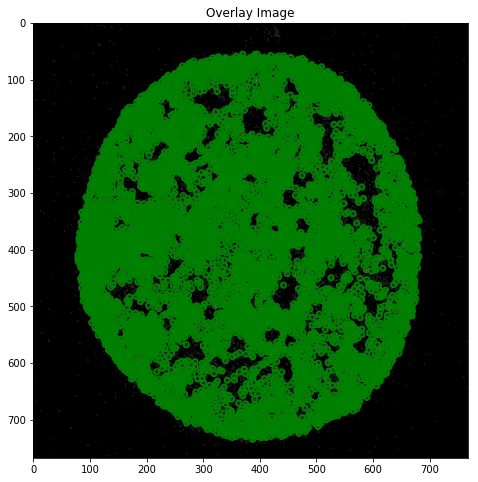

In [10]:
import storm_analysis.jupyter_examples.overlay_image as overlay_image
overlay_image.overlayImage("movie.tif", "movie.hdf5", 5)
#fig.savefig("srimbefore.tiff")

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

### Create an image of the analysis

Tracks not found, using localizations.
.


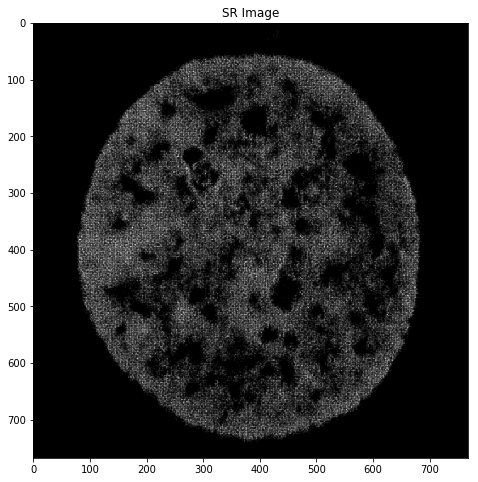

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [11]:
import matplotlib
import matplotlib.pyplot as pyplot

import storm_analysis.sa_utilities.hdf5_to_image as h5_image
#sigma=0.75 for chromatin
sr_im = h5_image.render2DImage("movie.hdf5", scale = 1, sigma =0.85)

fig=pyplot.figure(figsize = (8, 8))
pyplot.imshow(sr_im, cmap = "gray")
pyplot.title("SR Image")
pyplot.show()


#fig.savefig(r'C:\Users\Administrator\Documents\REVORGDATA\paper\extractedData\nanotagstirm\srim.tiff')

from scipy.misc import imsave
#x = np.zeros((255, 255))
#x = np.zeros((255, 255), dtype=np.uint8)
#x[:] = np.arange(255)
imsave('chromatin-forfig1-idu-stirmwhole.tiff', sr_im)

#import imageio
#im=sr_im
#im = np.zeros((255, 255), dtype=np.uint8)

#im = imageio.imread('imageio:astronaut.png')
#im.shape  # im is a numpy array
#(512, 512, 3)
#imageio.imwrite('astronaut-gray.tiff', im)

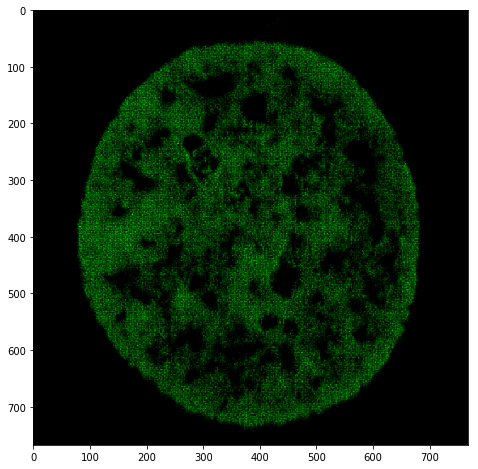

(768, 768, 3)


In [12]:
from PIL import Image
import numpy as np

from PIL import Image
im = Image.open('chromatin-forfig1-idu-stirmwhole.tiff')
#im = im.crop((200,200,400,400))

img = im



color=(0, 255, 0)
im = np.array(img)
#r, g, b, a = np.rollaxis(x, axis=-1)
#r[a == 0] = color[0]

#im=r


dim = np.zeros((768,768))

#select blue color for the image display and save
R = np.stack((dim,im, dim), axis=2)/255;

fig=pyplot.figure(figsize = (8, 8))
pyplot.imshow(R)
pyplot.show()
print(R.shape)



import matplotlib

matplotlib.image.imsave('chromatin-fig1b-idu-stirmcolorwhole.tiff', R)



rgb = np.zeros((255, 255, 3), dtype=np.uint8)
rgb[..., 0] = np.arange(255)
rgb[..., 1] = 55
rgb[..., 2] =  1- np.arange(255)

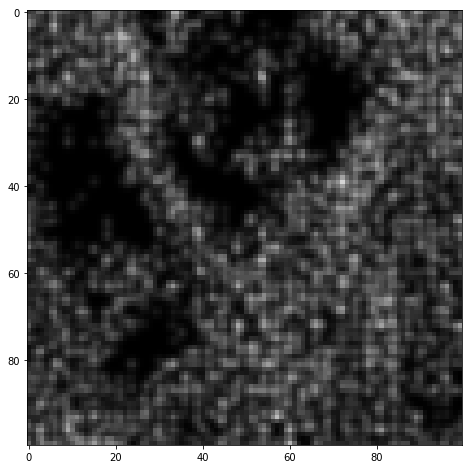

In [13]:

from PIL import Image
im = Image.open('chromatin-forfig1-idu-stirmwhole.tiff')
im = im.crop((250,250,350,350))
im.save('chromatin-fig1b-idu-stirmgray.tiff')

img = im
fig=pyplot.figure(figsize = (8, 8))


pyplot.imshow(img)


pyplot.show()

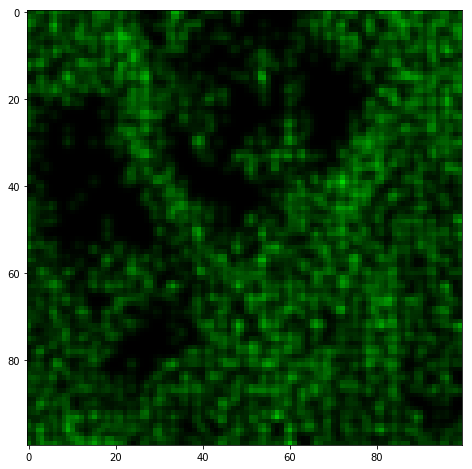

(100, 100, 3)


In [14]:
from PIL import Image
import numpy as np

color=(0, 255, 0)
im = np.array(img)
#r, g, b, a = np.rollaxis(x, axis=-1)
#r[a == 0] = color[0]

#im=r


dim = np.zeros((100,100))

#select blue color for the image display and save
R = np.stack((dim,im, dim), axis=2)/255;

fig=pyplot.figure(figsize = (8, 8))
pyplot.imshow(R)
pyplot.show()
print(R.shape)



import matplotlib

matplotlib.image.imsave('chromatin-fig1b-idu-stirmcolor.tiff', R)



rgb = np.zeros((255, 255, 3), dtype=np.uint8)
rgb[..., 0] = np.arange(255)
rgb[..., 1] = 55
rgb[..., 2] =  1- np.arange(255)

